# Project

### Submitted by: Mohammed Ihsan P, Aleena Francis, Rustham Shahan V, Alka Sherine Benny, Reuben M Sunil

### Domain-HR Analytics

Employee Attrition Prediction-:

In this project, we are going to predict whether an employee will leave or remain in the organization depending upon various factors using ML classification models.

# 1-Data Understanding and EDA-:

### Dataset Description:

ID-			          Employee ID

Name-			      Employee Name

Department-		      Department

GEO-			      Geographical location

Role-			      Current Role or title of employee

Rising Star-	      Indicates the level of promise or promote-ability the employee has. Scale(1-5)

Will_Relocate-	      Is the employee willing to relocate? 0- No, 1- Yes

Critical-		      Is the employee critical to the organization? 0- No, 1- Yes

Trending Perf-	      How is the employee trending in performance this year? Scale (1-10)

Talent_Level-	      This field represents a subjective level of management's view of the employee. Scale (1-10)

Validated_Talent_Level-This field represents senior managements view of what the manager stated.

Percent_Remote-	      The percentage of the employee's work that is done remotely.

EMP_Sat_OnPrem -      One indicator from a survey that was sent to employees.On prem (On premise) means that the employee                              maintains a high percentage of work on the corporation’s physical work locations. Scale (1-10)

EMP_Sat_Remote -      One indicator from a survey that was sent to employees. Remote (distance employee) means that the employee                        does a high percentage of work away from the corporation’s physical work locations. Scale (1-10)

EMP_Engagement -      One indicator from a survey that was sent to employees. Engagement represents the employee's feeling about                        how they feel about being engaged in company activities. Scale(1-5) 

last_evaluation-      The score on the last employee evaluation.Scale (1-10)

number_project-	      The number of projects the employee works on throughout the year.

average_montly_hours- The average number of hours the employee works monthly.

time_spend_company-	  Years of service

Work_accident -       The number of accidents the employee is involved in.

left_Company-		  Did the employee leave the company? 0- No, 1- Yes

CSR Factor -          Corporate Social Responsibility of employees.

promotion_last_5years-Did the employee get promoted in last 5 years? 0- No, 1- Yes

salary-			      Relative pay grade (low, medium, high) by role.

Gender-			      M or F

LinkedIn_Hits -       The number of times employee visits LinkedIn networking sites.

Emp_Work_Status -	  One indicator from a survey that was sent to employees. Status represents how strongly employee feels                            about their status level in the organization. Scale (1-10)

Emp_Identity-		  How the employee identifies themselves with the company. Scale (1-10)

Emp_Role-		      How the employee identifies themselves with the importance of their role in the company. Scale (1-10)

Emp_Position-		  How the employee identifies themselves with the importance of their position in the company. Scale (1-10)

Emp_Title-		      How the employee feels about their title.Scale (1-10)	

Women_Leave -         Women who left the company.

Men_Leave -           Men who left the company.

Emp_Competitive -	  One indicator from a survey that was sent to employees. How employee feels about the competitive nature                          of work in the organization. Scale (1-10)

Emp_Collaborative-    One indicator from a survey that was sent to employees. How employee feels about the collaborative nature                        of work in the organization.Scale (1-10)

Sensor_StepCount -    Sentient devices are used to capture certain employee activities. In this case number of steps.

Sensor_Heartbeat(Average/Min) - Sentient devices are used to capture certain employee activities. In this case heartbeat.

Sensor_Proximity(1-highest/10-lowest) - Sentient devices are used to capture certain employee activities. In this case how close                                         they are to their company laptop.

In [2]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.read_csv('HR_Engagement_Sat_Sales.csv')
data.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

In [6]:
data.shape

(14999, 62)

Our dataset contains 14999 rows and 62 columns.

In [7]:
data.describe(include='all')

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,14997,14999,14999,14999,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999,14999,14999,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
unique,NaN,14997,6,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,BRADDY,Operations,UK,Level 2-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,2500,1772,6889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316,7596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7500.000000,NaN,NaN,NaN,NaN,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,NaN,NaN,NaN,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,NaN,NaN,NaN,NaN,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,NaN,NaN,NaN,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,NaN,NaN,NaN,NaN,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,NaN,NaN,NaN,NaN,1.0,0.000000,1.0

*The dataset consists of details of employees from 9 different countries working in 6 departments performing various roles.

*There is about 50% chance that an employee will relocate. 

*Almost 61% of the work is done remotely by the employees.

*Each employee has completed atleast 2 projects and a maximum of 7 projects.

*Each employee works for minimum of 96 hours and a maximum of 310 hours on an average monthly.

*Almost 24% of the employees already left the organization.

*Only 2% of the employees got promotion in the last 5 years and most of the employees get low salary.

*Majority of the employees are females.

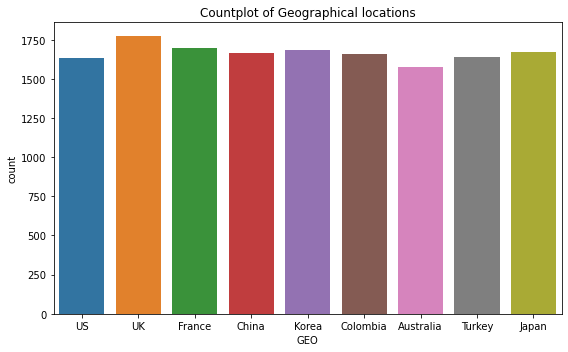

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data['GEO'])
plt.title('Countplot of Geographical locations')
plt.tight_layout()
plt.show()

*Compared to other countries, more employees are from UK and the least number of employees are from Australia. But there isn't a comparable difference in the number of employees from different countries.

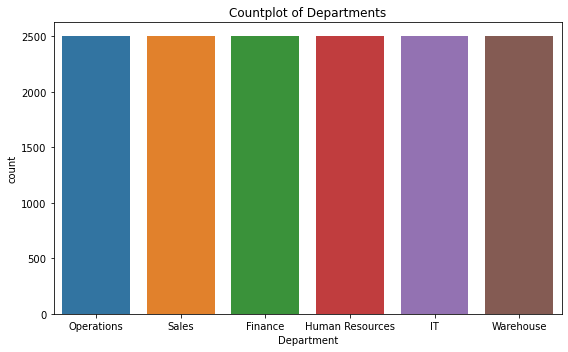

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data['Department'])
plt.title('Countplot of Departments')
plt.tight_layout()
plt.show()

*The number of employees from different departments are almost equal.

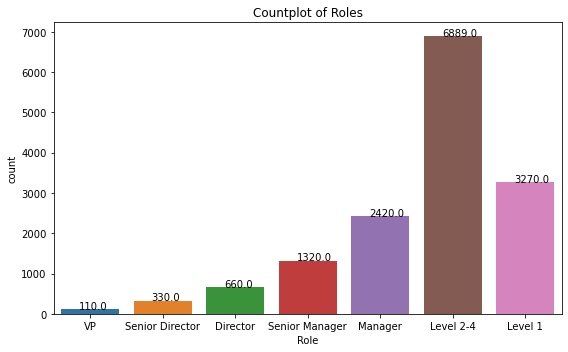

In [10]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data['Role'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Countplot of Roles')
plt.tight_layout()
plt.show()

*The organization has a total of 110 VP's, 330 Senior Directors, and 660 Directors.

In [11]:
data[['average_montly_hours','last_evaluation']].corr()

,average_montly_hours,last_evaluation
average_montly_hours,1.000000,0.339742
last_evaluation,0.339742,1.000000


*There is a low positive correlation between average monthly hours and last evaluation.

In [12]:
data[['average_montly_hours','number_project']].corr()

,average_montly_hours,number_project
average_montly_hours,1.000000,0.417211
number_project,0.417211,1.000000


*There is a low positive correlation between average monthly hours and number of projects.

In [13]:
data[['LinkedIn_Hits','Percent_Remote']].corr()

,LinkedIn_Hits,Percent_Remote
LinkedIn_Hits,1.000000,-0.713644
Percent_Remote,-0.713644,1.000000


*LinkedIn hits and Percent remote columns have high negative correlation.

In [14]:
data.groupby('Gender')['average_montly_hours'].mean()

Gender
F    200.216035
M    201.906389
Name: average_montly_hours, dtype: float64

*Both male and female employees spend almost same amount of time for work monthly.

In [15]:
data.groupby('Gender')['Work_accident'].sum()

Gender
F    1124
M    1045
Name: Work_accident, dtype: int64

*Females have had more work accidents when compared to males.

In [16]:
data.groupby('Gender')['left_Company'].sum()

Gender
F    1840
M    1731
Name: left_Company, dtype: int64

*More females have left the organization than males.

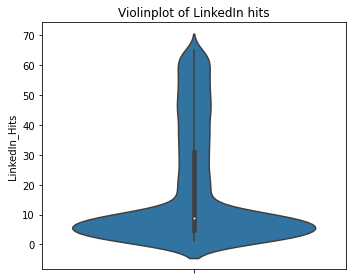

In [17]:
plt.figure(figsize=(5,4))
sns.violinplot(y=data['LinkedIn_Hits'])
plt.title('Violinplot of LinkedIn hits')
plt.tight_layout()
plt.show()

*more frequent linkedin hits are in between 0 and 10.

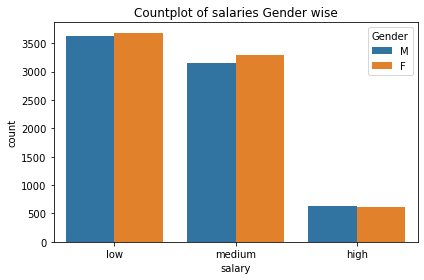

In [18]:
sns.countplot(data['salary'], hue=data['Gender'])
plt.title('Countplot of salaries Gender wise')
plt.tight_layout()
plt.show()

*Number of males and females in each salary level are almost equal.

*Most of the employees receive low salary. 

*only few employees enjoy high salary.

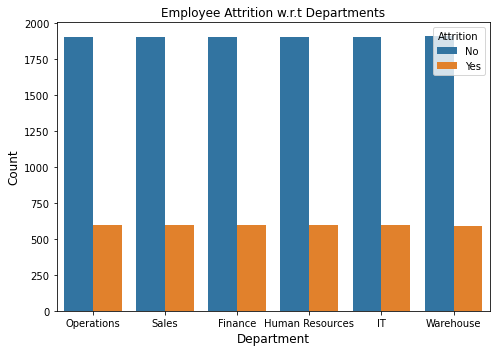

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(data['Department'], hue=data['left_Company'])
plt.title('Employee Attrition w.r.t Departments')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No','Yes'], title = "Attrition",loc="upper right")
plt.tight_layout()
plt.show()

*Almost same number of employees have left from each department.

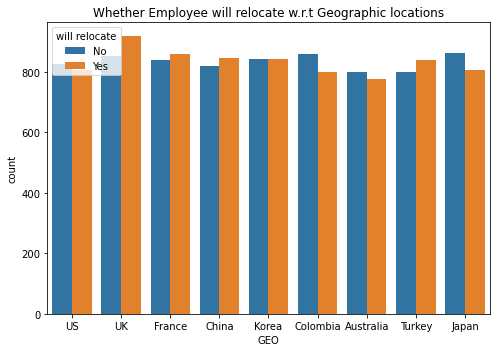

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(data['GEO'], hue=data['Will_Relocate'])
plt.title('Whether Employee will relocate w.r.t Geographic locations')
plt.legend(['No','Yes'],title='will relocate', loc="upper left")
plt.tight_layout()
plt.show()

*When we compare all of the geographic locations, we can see that there is not much difference between the number of employees willing to relocate and not.

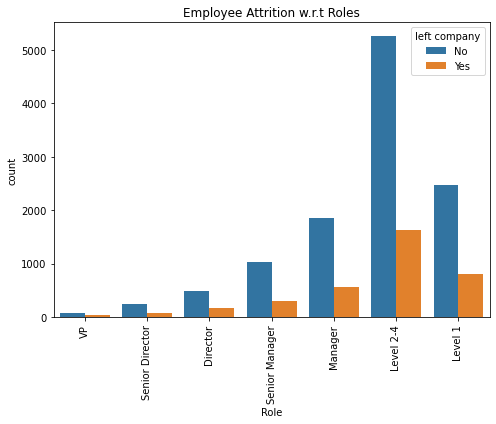

In [21]:
plt.figure(figsize=(7,6))
sns.countplot(data['Role'], hue=data['left_Company'])
plt.title('Employee Attrition w.r.t Roles')
plt.legend(['No','Yes'],title='left company', loc="upper right")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

*Most of the employees who have left the company are from Level 2-4 role.

*Number of employees who left the organization increased with total number of employees in each role.

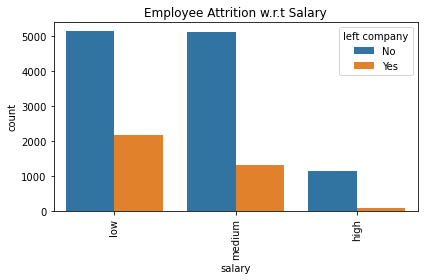

In [25]:
sns.countplot(data['salary'], hue=data['left_Company'])
plt.title('Employee Attrition w.r.t Salary')
plt.legend(['No','Yes'],title='left company', loc="upper right")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

*Employees with low salaries have left the organization in more numbers.

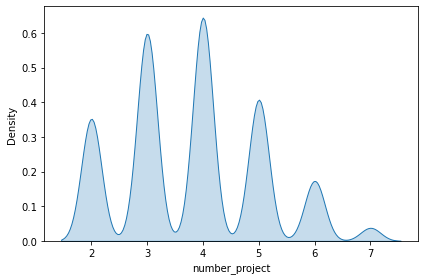

In [23]:
sns.kdeplot(data['number_project'],fill=True)
plt.tight_layout()
plt.show()

*Each employee has completed atleast 2 projects and a maximum of 7 projects.

*Most of the employees have completed 3-5 projects.

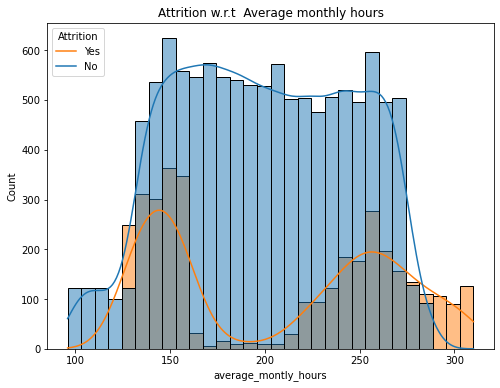

In [27]:
#attrition w.r.t average monthly hrs 
plt.figure(figsize=(8,6))
sns.histplot(x='average_montly_hours', hue='left_Company', data=data, kde=True)
plt.title('Attrition w.r.t  Average monthly hours')
plt.legend(['Yes','No'],title='Attrition', loc="upper left")
plt.show()

*All the employees who have worked for nearly 300 hours on a monthly average left the organization.

*Employees who have worked for minimum hours on a monthly average are continuing in the organization.